# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json

#read and write to csv
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

print ( "api key: " + api_key)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

api key: 5496eb7940cce51784e2da9e7044b248


## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#print city details
for city in cities:
    print ( city)

barrow
illoqqortoormiut
punta arenas
cape town
nemuro
esperance
nouakchott
faanui
ushuaia
ribeira grande
dikson
busselton
longyearbyen
lima
kapaa
orlik
aksarka
katherine
tuktoyaktuk
rikitea
haines junction
new norfolk
mitsamiouli
loa janan
sao joao da barra
yellowknife
saint george
makat
port-gentil
vaini
luderitz
salto
georgetown
lebu
albany
bargal
hofn
east london
belushya guba
longlac
san patricio
jamestown
clyde river
ataco
atuona
cabo san lucas
barentsburg
airai
guipavas
hilo
bethel
olafsvik
castro
belmonte
jawor
yar-sale
anadyr
russell
opelousas
havelock
chapais
taganak
portland
arraial do cabo
hermanus
dicabisagan
bengkulu
inhambane
warmbad
puerto ayora
butaritari
port augusta
hobart
burica
batagay-alyta
leningradskiy
mayo
dzilam gonzalez
jumla
heihe
columbus
nikolskoye
nantucket
hasaki
upernavik
aklavik
torbay
vila franca do campo
port alfred
shikarpur
ancud
tidore
ashnak
windhoek
nizhneyansk
namibe
lorengau
les cayes
deputatskiy
vrangel
inverell
rio gallegos
melfi
ternate
kaza

In [31]:
len (cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
#url = (f"https://openweathermap.org/api?q=Seattle&APPID=5496eb7940cce51784e2da9e7044b248")
# Save config information.
# Import API key
from api_keys import api_key

url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'Imperial'

#create a list of lists to store city details
allDetails = []

#loop through each city
#add a counter for number of records
counter = 0
for cityName in cities:
    #print (f'processing city: {cityName}')
    query_url = f"{url}appid={api_key}&q={cityName}&units={units}"
    response = requests.get(query_url)
    data = response.json()
    if data['cod']==200:
        city_id = str(data['id'])
        city_name =  data['name']
        cityDetails = {}
        cityDetails['CityID'] = city_id
        cityDetails['Name']  = data['name']
        cityDetails['Cloudiness'] = data['clouds']['all']
        cityDetails['Country'] = data['sys']['country']
        cityDetails['Lat'] = data['coord']['lat']
        cityDetails['Lng'] = data['coord']['lon']
        cityDetails['Date'] =data['dt']
        cityDetails['Temp'] = data['main']['temp']
        cityDetails['Humidity'] = data['main']['humidity']
        cityDetails['Wind Speed'] = data['wind']['speed']
        counter = counter + 1
        allDetails.append(cityDetails)
        print (f" processing record: {counter} | city id = {city_id} city name ={city_name}")
        #pprint(data)
    else:
        print (f"No data found for city : {cityName}")

 processing record: 1 | city id = 3833859 city name =Barrow
No data found for city : illoqqortoormiut
 processing record: 2 | city id = 3874787 city name =Punta Arenas
 processing record: 3 | city id = 3369157 city name =Cape Town
 processing record: 4 | city id = 2128975 city name =Nemuro
 processing record: 5 | city id = 3573739 city name =Esperance
 processing record: 6 | city id = 2377450 city name =Nouakchott
 processing record: 7 | city id = 4034551 city name =Faanui
 processing record: 8 | city id = 3833367 city name =Ushuaia
 processing record: 9 | city id = 3372707 city name =Ribeira Grande
 processing record: 10 | city id = 1507390 city name =Dikson
 processing record: 11 | city id = 2075265 city name =Busselton
 processing record: 12 | city id = 2729907 city name =Longyearbyen
 processing record: 13 | city id = 3936456 city name =Lima
 processing record: 14 | city id = 5848280 city name =Kapaa
 processing record: 15 | city id = 1496073 city name =Orlik
 processing record: 16

 processing record: 123 | city id = 3589805 city name =San Marcos
 processing record: 124 | city id = 2126123 city name =Chokurdakh
 processing record: 125 | city id = 6355222 city name =Yulara
 processing record: 126 | city id = 3863379 city name =Mar del Plata
 processing record: 127 | city id = 535839 city name =Leshukonskoye
 processing record: 128 | city id = 6096551 city name =Pangnirtung
 processing record: 129 | city id = 4021858 city name =Guerrero Negro
 processing record: 130 | city id = 3421319 city name =Nuuk
 processing record: 131 | city id = 3374210 city name =Sao Filipe
 processing record: 132 | city id = 5354943 city name =Half Moon Bay
 processing record: 133 | city id = 474470 city name =Verkhnyaya Toyma
 processing record: 134 | city id = 383388 city name =Siaya
 processing record: 135 | city id = 1272864 city name =Dharchula
 processing record: 136 | city id = 5563397 city name =Eureka
 processing record: 137 | city id = 1528998 city name =Yumen
 processing record

 processing record: 244 | city id = 1489401 city name =Toora-Khem
No data found for city : paradwip
 processing record: 245 | city id = 2147756 city name =Swan Hill
 processing record: 246 | city id = 4407665 city name =Kodiak
 processing record: 247 | city id = 934322 city name =Mahebourg
 processing record: 248 | city id = 779554 city name =Honningsvag
 processing record: 249 | city id = 3532499 city name =Tecoanapa
 processing record: 250 | city id = 3190586 city name =Paka
 processing record: 251 | city id = 1490256 city name =Talnakh
 processing record: 252 | city id = 2206357 city name =Opunake
 processing record: 253 | city id = 2095925 city name =Ialibu
No data found for city : sorvag
 processing record: 254 | city id = 2033630 city name =Xiongyue
 processing record: 255 | city id = 3932145 city name =Pisco
 processing record: 256 | city id = 3870243 city name =Taltal
 processing record: 257 | city id = 5960603 city name =Geraldton
 processing record: 258 | city id = 2618795 ci

 processing record: 368 | city id = 3427208 city name =Pilar
 processing record: 369 | city id = 3464008 city name =Esmeraldas
 processing record: 370 | city id = 5914132 city name =Campbell River
 processing record: 371 | city id = 3860443 city name =Comodoro Rivadavia
 processing record: 372 | city id = 2021017 city name =Kysyl-Syr
No data found for city : mahanje
 processing record: 373 | city id = 3470674 city name =Barra dos Coqueiros
 processing record: 374 | city id = 4267710 city name =Sitka
 processing record: 375 | city id = 1486910 city name =Komsomolskiy
 processing record: 376 | city id = 1488741 city name =Tyumentsevo
 processing record: 377 | city id = 3392734 city name =Paulo Afonso
 processing record: 378 | city id = 2020591 city name =Magdagachi
No data found for city : amderma
 processing record: 379 | city id = 347796 city name =Sohag
 processing record: 380 | city id = 5293083 city name =Douglas
 processing record: 381 | city id = 2995603 city name =Saint-Pierre
 p

 processing record: 489 | city id = 1799686 city name =Tongzi
 processing record: 490 | city id = 3452925 city name =Niteroi
 processing record: 491 | city id = 4597948 city name =Sumter
 processing record: 492 | city id = 779622 city name =Havoysund
 processing record: 493 | city id = 2316473 city name =Bosobolo
No data found for city : ituni
 processing record: 494 | city id = 2414926 city name =Telimele
 processing record: 495 | city id = 3172402 city name =Nago
 processing record: 496 | city id = 2090021 city name =Namatanai
 processing record: 497 | city id = 1280037 city name =Shache
 processing record: 498 | city id = 5815136 city name =Washougal
 processing record: 499 | city id = 1513990 city name =Gazli
 processing record: 500 | city id = 588365 city name =Vao
 processing record: 501 | city id = 2068110 city name =Kununurra
 processing record: 502 | city id = 1254177 city name =Trimbak
No data found for city : aflu
No data found for city : samalaeulu
 processing record: 503 |

In [26]:
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=5496eb7940cce51784e2da9e7044b248&q=bathsheba&units=Imperial'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
# create a csv file
# add headers
def writeDictToCSV(fileName,csv_columns,dict_data):
    with open(fileName, 'w') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
            writer.writeheader()
            for data in dict_data:
                writer.writerow(data)
    return            

headers= ['CityID', 'Name', 'Cloudiness', 
              'Country', 'Date', 'Humidity', 
              'Lat', 'Lng', 'Temp', 'Wind Speed']
writeDictToCSV('weatherData.csv',headers,allDetails)



In [60]:
def readCSVFile(csv_file):
    with open(csv_file) as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                print( row['CityID'], row['Name'], row ['Cloudiness'], 
              row ['Country'], row ['Date'], row ['Humidity'], 
              row ['Lat'], row ['Lng'], row ['Temp'], row ['Wind Speed'])
    return

# readCSVFile('weatherData.csv')
data = pd.read_csv("weatherData.csv") 
data.head()

,CityID,Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Temp,Wind Speed
0,3833859,Barrow,100,AR,1538240672,100,-38.31,-60.23,55.00,10.67
1,3874787,Punta Arenas,40,CL,1538236800,64,-53.16,-70.91,41.13,9.17
2,3369157,Cape Town,0,ZA,1538236800,63,-33.93,18.42,66.20,9.17
3,2128975,Nemuro,48,JP,1538240673,98,43.32,145.57,61.21,11.79
4,3573739,Esperance,75,TT,1538236800,66,10.24,-61.45,87.80,13.87


In [61]:
data['Humidity'].max()

319

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

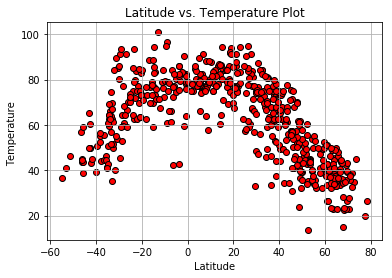

In [62]:
fig, ax = plt.subplots()

plt.scatter(data.Lat, data.Temp,
            facecolor= "red", 
            edgecolors="black", 
            label='',
            marker='o')
          
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature ")
ax.grid(True)


# Save Figure
plt.savefig('LatitudevsTemperature.png', bbox_inches = "tight")

#### Latitude vs. Humidity Plot

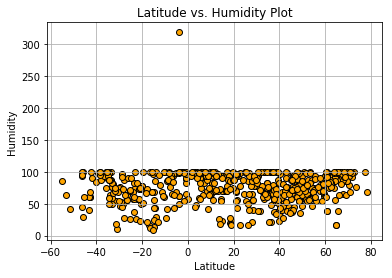

In [63]:
fig, ax = plt.subplots()

plt.scatter(data.Lat, data.Humidity , 
            facecolor= "orange", 
            edgecolors="black", 
            label='',
            marker='o')
          
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
ax.grid(True)


# Save Figure
plt.savefig('LatitudevsHumidity.png', bbox_inches = "tight")

#### Latitude vs. Cloudiness Plot

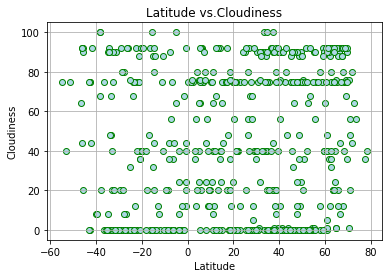

In [64]:
fig, ax = plt.subplots()

plt.scatter(data.Lat, data.Cloudiness, 
            facecolor= "lightblue", 
            edgecolors="green", 
            label='',
            marker='o')
          
plt.title("Latitude vs.Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
ax.grid(True)


# Save Figure
plt.savefig('LatitudevsCloudiness.png', bbox_inches = "tight")

#### Latitude vs. Wind Speed Plot

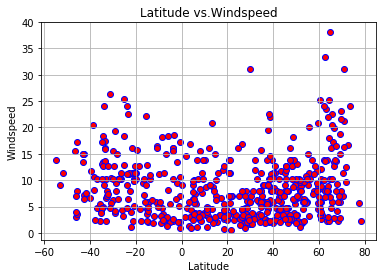

In [67]:
fig, ax = plt.subplots()

plt.scatter(data.Lat, data["Wind Speed"], 
            facecolor= "red", 
            edgecolors="blue", 
            label='',
            marker='o')
          
plt.title("Latitude vs.Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
ax.grid(True)


# Save Figure
plt.savefig('LatitudevsWindspeed.png', bbox_inches = "tight")

Observations:
1. Interestingly, one city in the range of 300 (humidity) closer to the equator. Otherwise, there is no correlation between latitude vs. humidity level.
2. it is true that temperature gets warmer as you go close to the equator.
3. Windspeed and cloudiness has no correlation with latitude.
